In [1]:
import numpy as np 
# import matplotlib as mp
# %matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib as tc
from tools_update import state
import tools 
import math

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from models_update import Actor, Critic
from memory import Memory
from ddpg import DDPG

load model

In [3]:
#hyper-parameters
steps = 10000
actor_lr = 1e-4
critic_lr = 1e-3
batch_size = 64
gamma = 0.99
tau = 0.01
nb_actions = 1
limit=int(5000)
episodes = 10000

In [4]:
import cv2
from jump_env_update import Jump_Env
number_templet = [cv2.imread('templet/{}.jpg'.format(i)) for i in range(10)]
restart_templet = cv2.imread('templet/again.jpg')
env = Jump_Env(number_templet=number_templet, restart_templet=restart_templet)

In [5]:
tf.reset_default_graph()
actor = Actor(nb_actions, layer_norm=True)
critic = Critic(layer_norm=True)

In [6]:
memory = Memory(limit, action_shape=env.action_shape, observation_shape=env.observation_shape)
agent = DDPG(actor, critic, memory, env.observation_shape, env.action_shape,
                 actor_lr=actor_lr, critic_lr=critic_lr, batch_size=batch_size,
                 gamma=gamma, tau=tau)
sess = tf.Session()

setting up target updates ...
len 16 = 16
{ target_actor/Conv/weights:0 } <- { actor/Conv/weights:0 }
{ target_actor/Conv/biases:0 } <- { actor/Conv/biases:0 }
{ target_actor/Conv_1/weights:0 } <- { actor/Conv_1/weights:0 }
{ target_actor/Conv_1/biases:0 } <- { actor/Conv_1/biases:0 }
{ target_actor/Conv_2/weights:0 } <- { actor/Conv_2/weights:0 }
{ target_actor/Conv_2/biases:0 } <- { actor/Conv_2/biases:0 }
{ target_actor/dense/kernel:0 } <- { actor/dense/kernel:0 }
{ target_actor/dense/bias:0 } <- { actor/dense/bias:0 }
{ target_actor/LayerNorm/beta:0 } <- { actor/LayerNorm/beta:0 }
{ target_actor/LayerNorm/gamma:0 } <- { actor/LayerNorm/gamma:0 }
{ target_actor/dense_1/kernel:0 } <- { actor/dense_1/kernel:0 }
{ target_actor/dense_1/bias:0 } <- { actor/dense_1/bias:0 }
{ target_actor/LayerNorm_1/beta:0 } <- { actor/LayerNorm_1/beta:0 }
{ target_actor/LayerNorm_1/gamma:0 } <- { actor/LayerNorm_1/gamma:0 }
{ target_actor/dense_2/kernel:0 } <- { actor/dense_2/kernel:0 }
{ target_actor/d

In [7]:
checkpoint = './ddpg-zero-model-envnoise-inputdim4/experiments/checkpoints/model2000'

In [8]:
saver = tf.train.Saver()
print("Loading model checkpoint {}...\n".format(checkpoint))
saver.restore(sess, checkpoint)
agent.sess = sess

Loading model checkpoint ./ddpg-zero-model-envnoise-inputdim4/experiments/checkpoints/model2000...

INFO:tensorflow:Restoring parameters from ./ddpg-zero-model-envnoise-inputdim4/experiments/checkpoints/model2000


In [9]:
actor.vars[0:16]

[<tf.Variable 'actor/Conv/weights:0' shape=(8, 8, 1, 32) dtype=float32_ref>,
 <tf.Variable 'actor/Conv/biases:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'actor/Conv_1/weights:0' shape=(4, 4, 32, 32) dtype=float32_ref>,
 <tf.Variable 'actor/Conv_1/biases:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'actor/Conv_2/weights:0' shape=(3, 3, 32, 32) dtype=float32_ref>,
 <tf.Variable 'actor/Conv_2/biases:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'actor/dense/kernel:0' shape=(2048, 200) dtype=float32_ref>,
 <tf.Variable 'actor/dense/bias:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'actor/LayerNorm/beta:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'actor/LayerNorm/gamma:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'actor/dense_1/kernel:0' shape=(200, 200) dtype=float32_ref>,
 <tf.Variable 'actor/dense_1/bias:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'actor/LayerNorm_1/beta:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'actor/LayerNorm_1/gamma:0' shape

In [10]:
critic.vars[0:16]

[<tf.Variable 'critic/Conv/weights:0' shape=(8, 8, 1, 32) dtype=float32_ref>,
 <tf.Variable 'critic/Conv/biases:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'critic/Conv_1/weights:0' shape=(4, 4, 32, 32) dtype=float32_ref>,
 <tf.Variable 'critic/Conv_1/biases:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'critic/Conv_2/weights:0' shape=(3, 3, 32, 32) dtype=float32_ref>,
 <tf.Variable 'critic/Conv_2/biases:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'critic/dense/kernel:0' shape=(2048, 200) dtype=float32_ref>,
 <tf.Variable 'critic/dense/bias:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'critic/LayerNorm/beta:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'critic/LayerNorm/gamma:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'critic/dense_1/kernel:0' shape=(201, 200) dtype=float32_ref>,
 <tf.Variable 'critic/dense_1/bias:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'critic/LayerNorm_1/beta:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'critic/LayerNorm_1/

In [11]:
a_vars = []
for i in range(16):
    a_vars.append(sess.run(actor.vars[i]))

In [12]:
c_vars = []
for i in range(16):
    c_vars.append(sess.run(critic.vars[i]))

In [13]:
# sess.close()
# tf.reset_default_graph()

In [14]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
#         plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


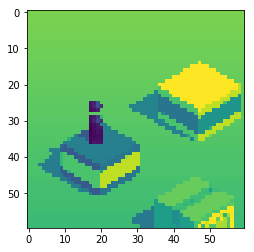

In [15]:
obs_ls = state('./vis_img/l-s.jpg')
plt.imshow(obs_ls[:,:,0])
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


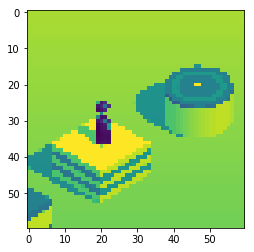

In [16]:
obs_lr = state('./vis_img/l-r.jpg')
plt.imshow(obs_lr[:,:,0])
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


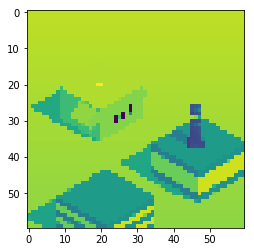

In [17]:
obs_rs = state('./vis_img/r-s.jpg')
plt.imshow(obs_rs[:,:,0])
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


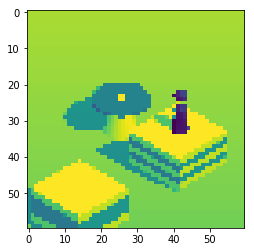

In [18]:
obs_rr = state('./vis_img/r-r.jpg')
plt.imshow(obs_rr[:,:,0])
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


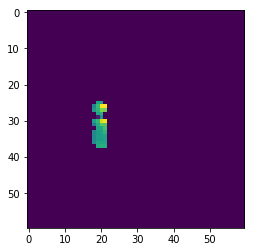

In [19]:
obs_jump = state('./vis_img/jump.jpg')
obs_jump[:,0:18,0] = 0
obs_jump[:,22:,0] = 0
plt.imshow(obs_jump[:,:,0])
plt.show()

set observation

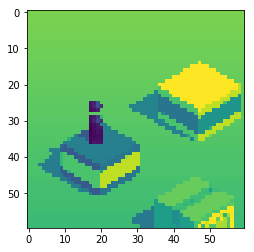

In [20]:
#observation
obs = obs_ls
plt.imshow(obs[:,:,0])
plt.show()

In [21]:
feed_dict = {agent.obs0: [obs]}

In [22]:
action = sess.run(agent.actor_tf, feed_dict=feed_dict)
action

array([[-0.27190644]], dtype=float32)

In [23]:
env.action_to_presstime(action)

736

In [24]:
a_conv_1 = sess.run(actor.conv_1, feed_dict=feed_dict)
a_conv_2 = sess.run(actor.conv_2, feed_dict=feed_dict)
a_conv_3 = sess.run(actor.conv_3, feed_dict=feed_dict)

c_conv_1 = sess.run(critic.conv_1, feed_dict=feed_dict)
c_conv_2 = sess.run(critic.conv_2, feed_dict=feed_dict)
c_conv_3 = sess.run(critic.conv_3, feed_dict=feed_dict)

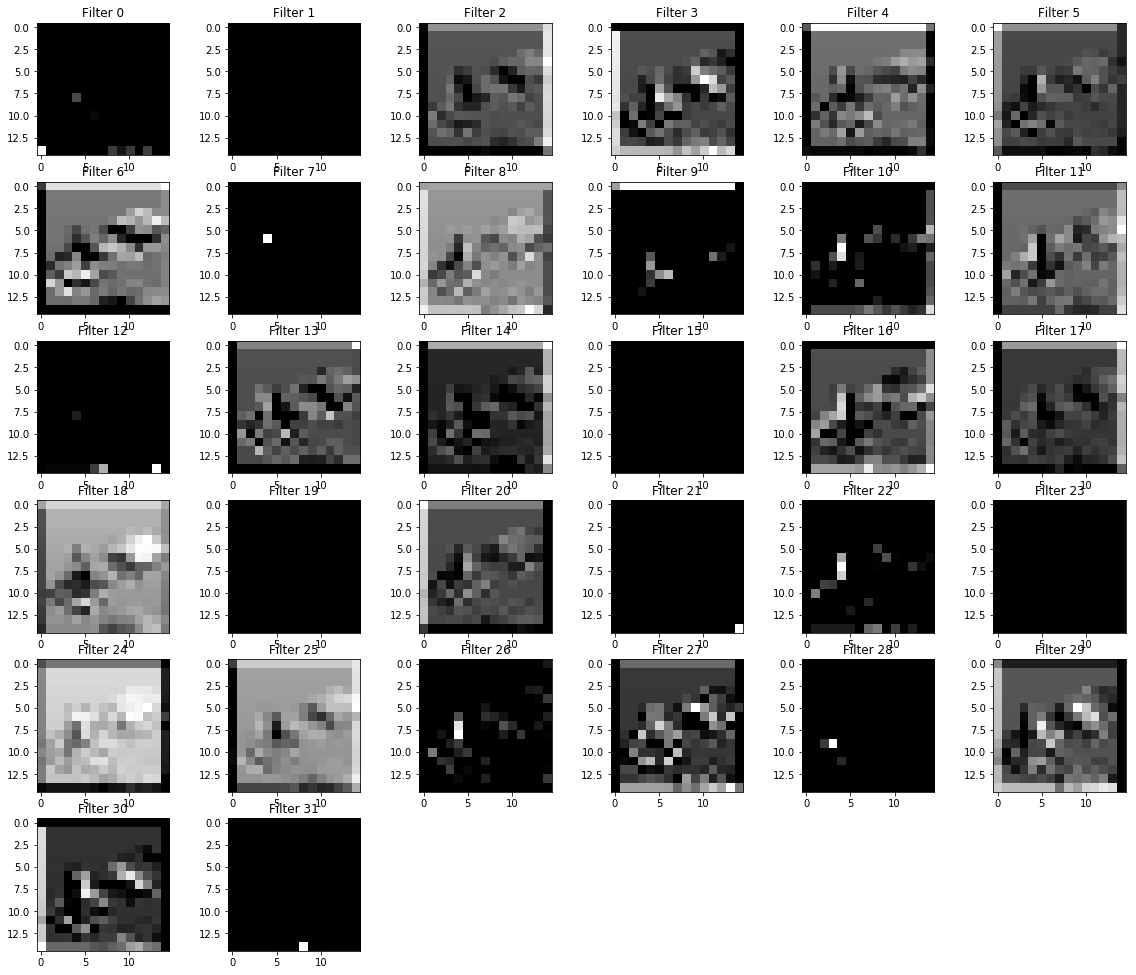

In [25]:
plotNNFilter(a_conv_1)
plt.show()

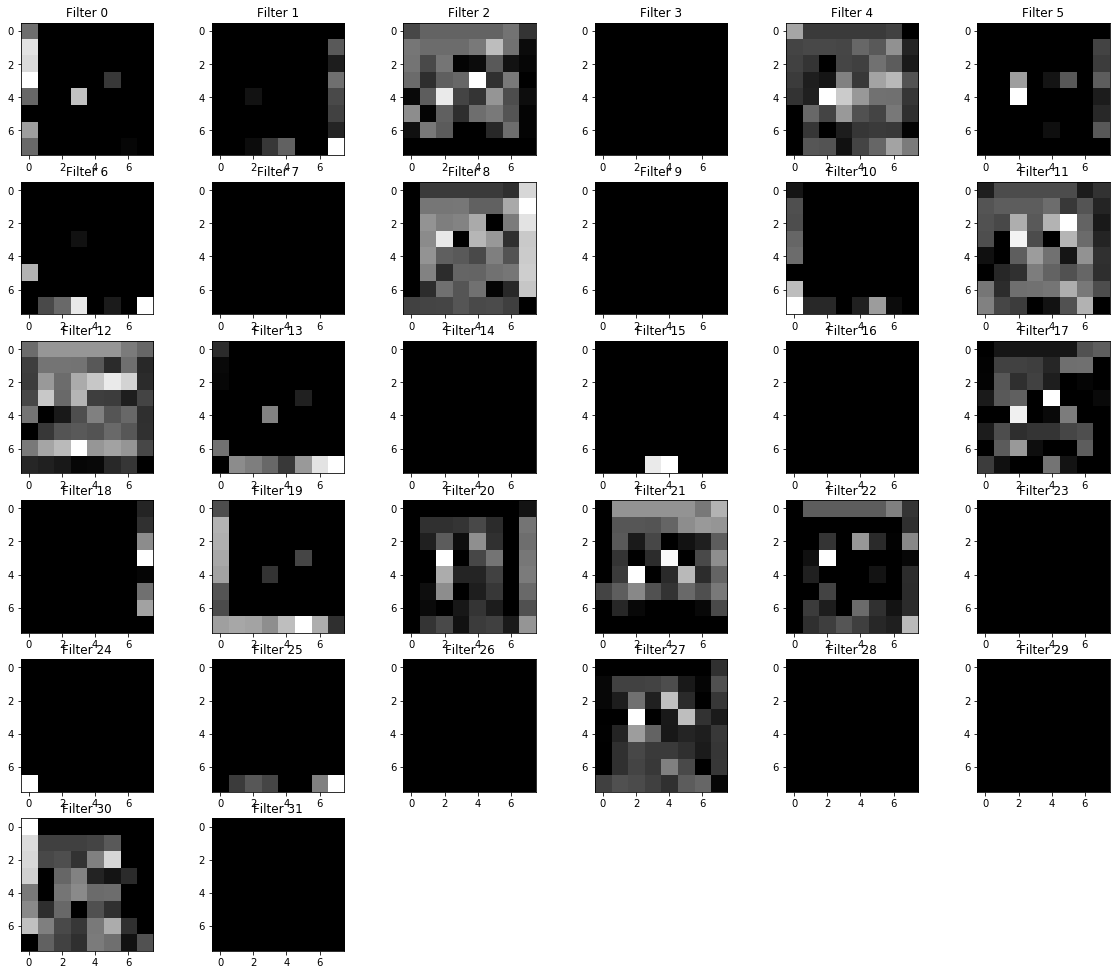

In [26]:
plotNNFilter(a_conv_2)
plt.show()

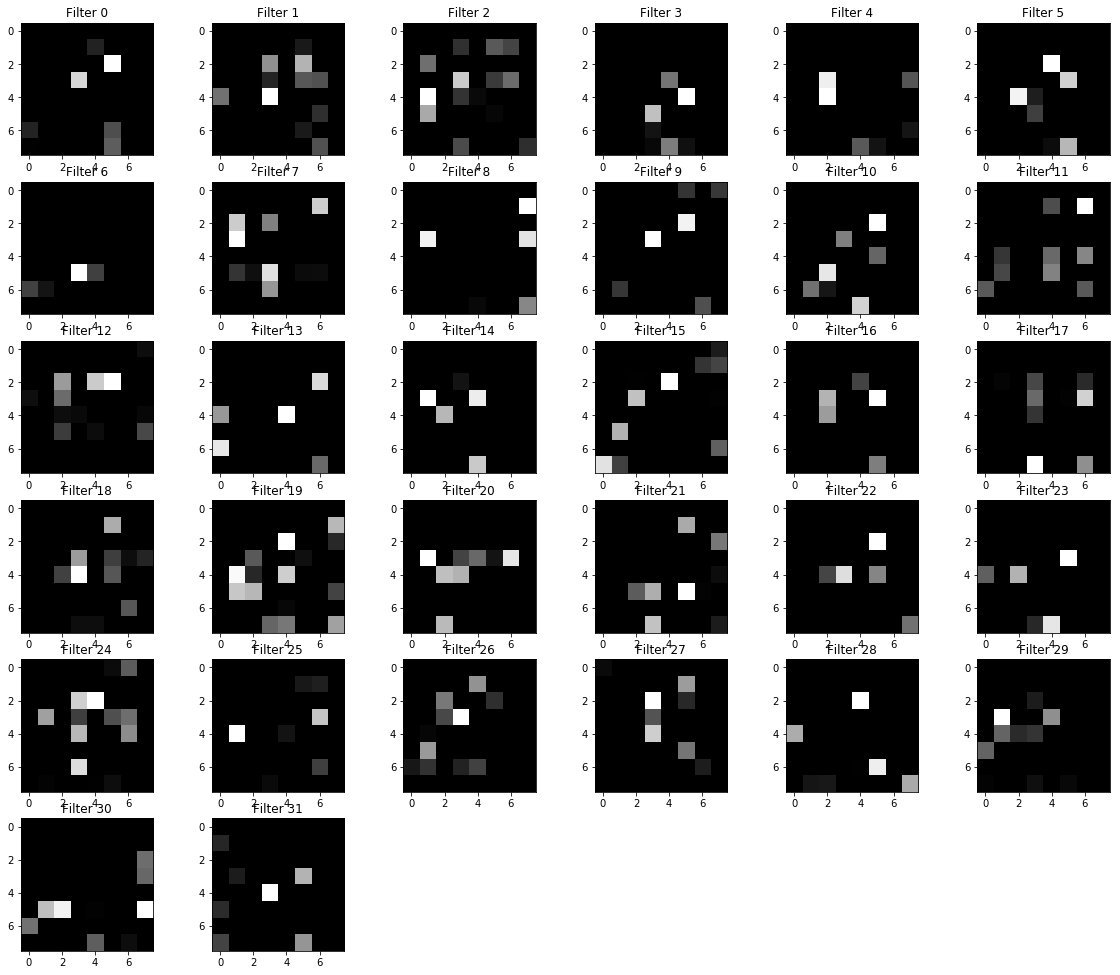

In [27]:
plotNNFilter(a_conv_3)
plt.show()

In [28]:
def plotSSFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,10))
    n_columns = 8
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
        plt.axis('off')

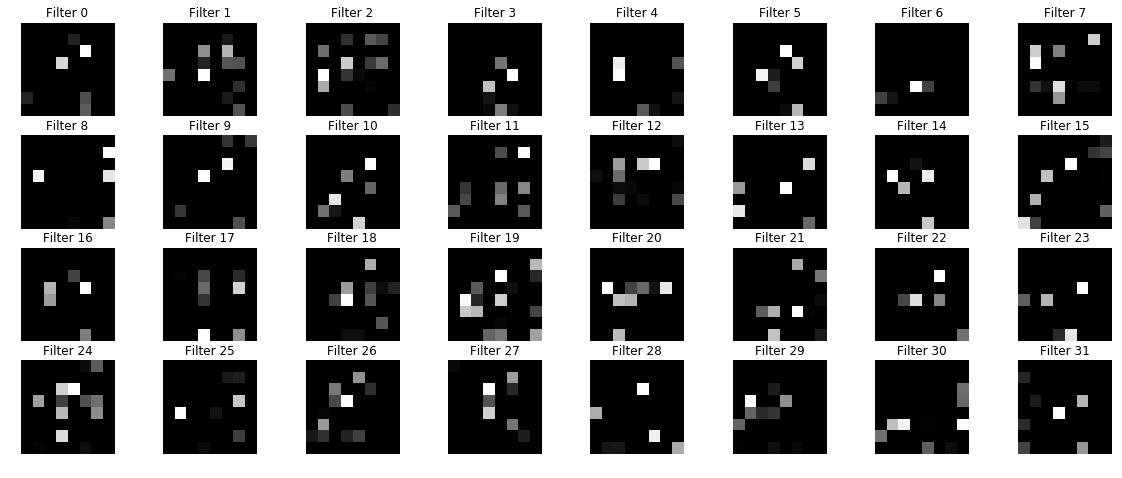

In [29]:
plotSSFilter(a_conv_3)
plt.show()

In [28]:
#set filter
f = 4

In [29]:
r3_f = a_conv_3[0,:,:,f]
# r3_f[r3_f<r3_f.max()] = 0

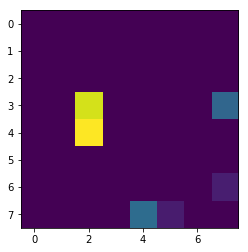

In [30]:
plt.imshow(r3_f)
plt.show()

In [31]:
r3 = np.zeros([1, 8, 8, 32])
r3[0,:,:,f] = r3_f

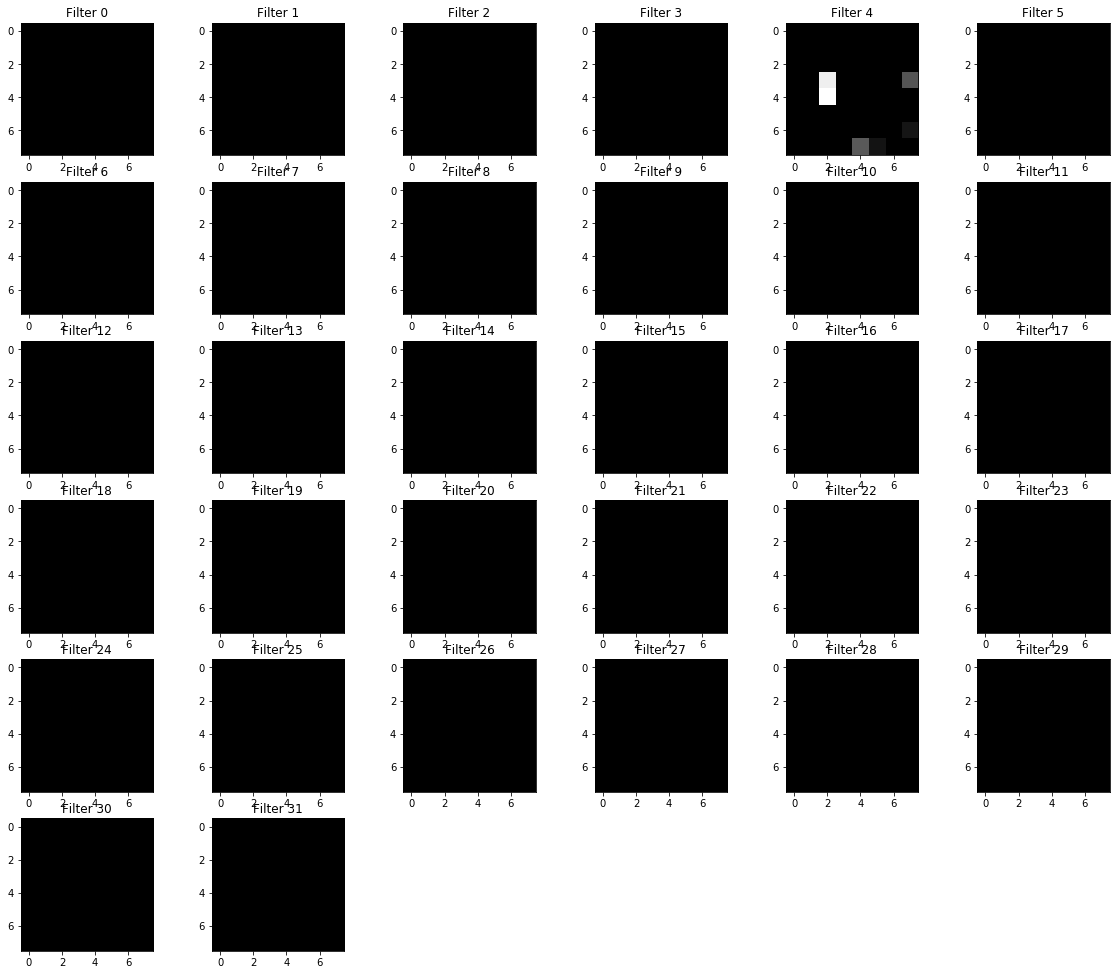

In [32]:
plotNNFilter(r3)
plt.show()

In [33]:
mask_2 = a_conv_2.copy()
mask_2[mask_2>0] = 1

In [34]:
mask_1 = a_conv_1.copy()
mask_1[mask_1>0] = 1

deconvnet

In [35]:
mask_2_t = tf.placeholder(tf.float32, shape=(1, 8, 8, 32), name='mask_2_t')
mask_1_t = tf.placeholder(tf.float32, shape=(1, 15, 15, 32), name='mask_1_t')

In [36]:
deconv_3 = tf.placeholder(tf.float32, shape=(1, 8, 8, 32), name='deconv_3')

In [37]:
deconv_2 = tf.nn.relu(deconv_3)
deconv_2 = tf.nn.conv2d_transpose(deconv_2, actor.vars[4], (1, 8, 8, 32), [1,1,1,1])
deconv_2 = tf.multiply(deconv_2,mask_2_t)

In [38]:
deconv_1 = tf.nn.relu(deconv_2)
deconv_1 = tf.nn.conv2d_transpose(deconv_1, actor.vars[2], (1, 15, 15, 32), [1,2,2,1])
deconv_1 = tf.multiply(deconv_1,mask_1_t)

In [39]:
deconv_0 = tf.nn.relu(deconv_1)
deconv_0 = tf.nn.conv2d_transpose(deconv_0, actor.vars[0], (1, 60, 60, 1), [1,4,4,1])

In [40]:
out = sess.run(deconv_0, feed_dict = {deconv_3:r3, mask_2_t:mask_2, mask_1_t:mask_1})

In [41]:
out.shape

(1, 60, 60, 1)

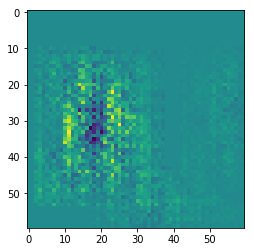

In [42]:
plt.imshow(out[0,:,:,0])
plt.show()

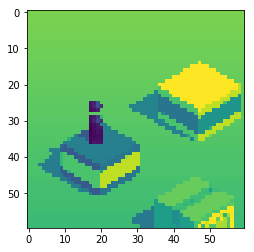

In [43]:
#observation
plt.imshow(obs[:,:,0])
plt.show()